In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action="ignore")

In [2]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

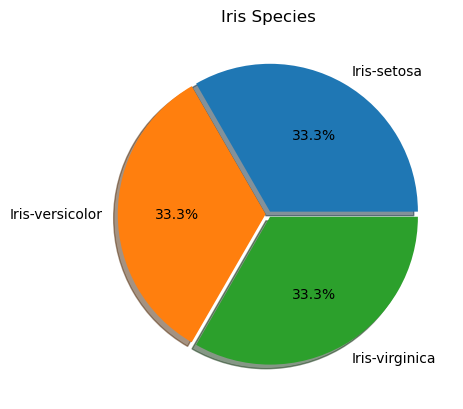

In [8]:
# Visualization
plt.pie(df.species.value_counts(),
        [0.02,0.02,0.02],
        labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
        autopct = "%1.1f%%",
        shadow = True)
plt.title("Iris Species")
plt.show()

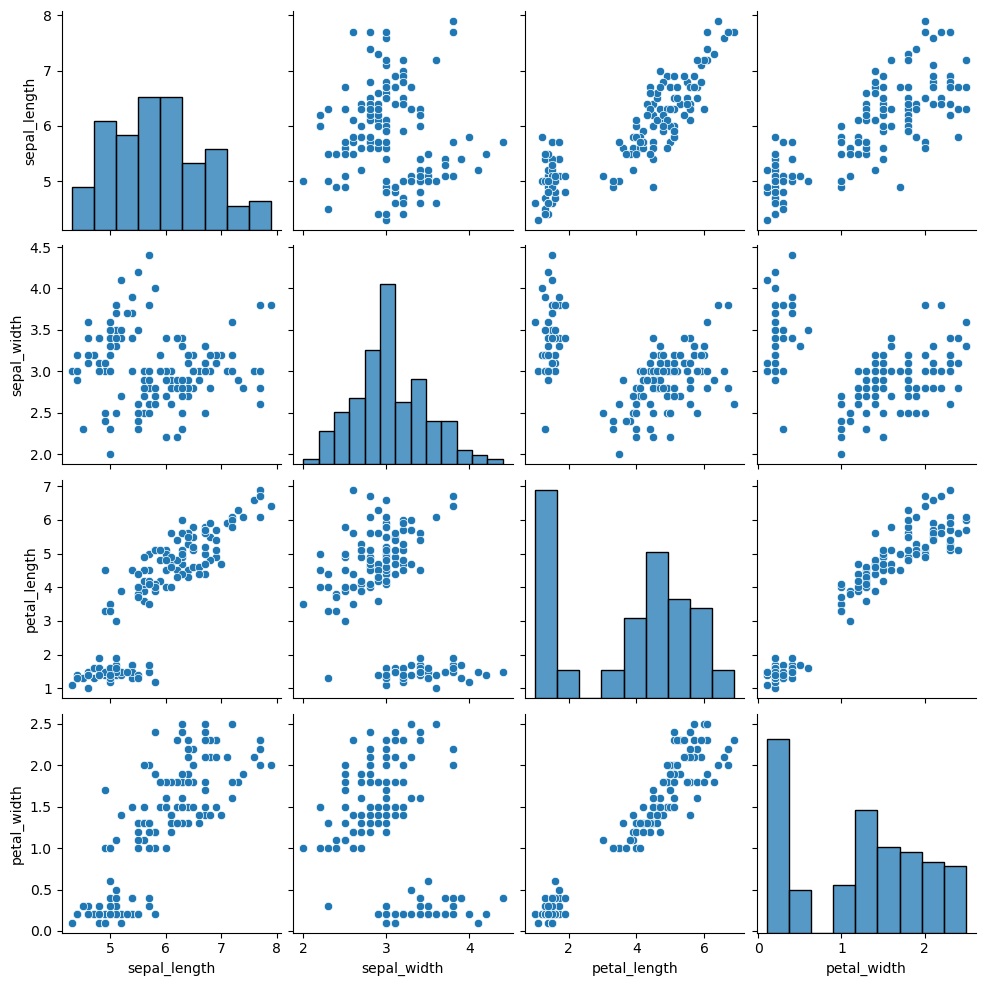

In [9]:
sns.pairplot(df)

<AxesSubplot:>

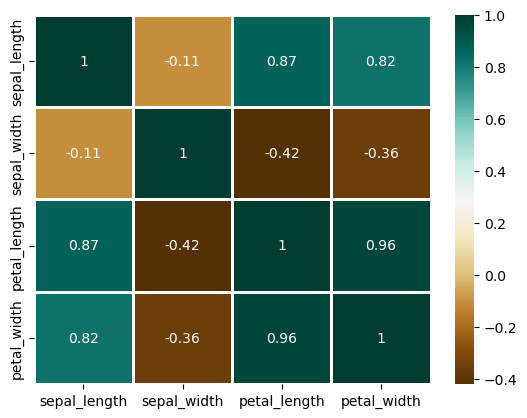

In [10]:
sns.heatmap(df.corr(),annot=True, linewidths= 1,cmap = 'BrBG')

<AxesSubplot:xlabel='sepal_width'>

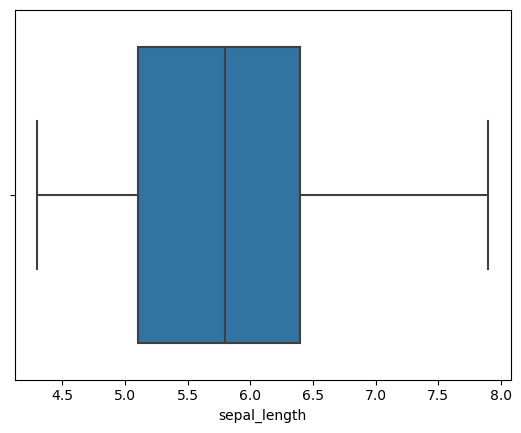

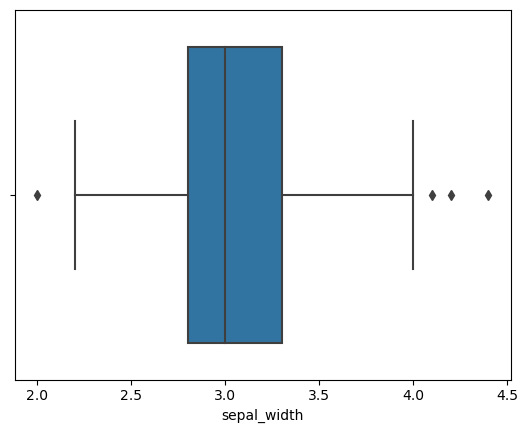

In [11]:
# Checking for Outliers
plt.figure(1)
sns.boxplot(df.sepal_length)
plt.figure(2)
sns.boxplot(df.sepal_width)

<AxesSubplot:xlabel='petal_width'>

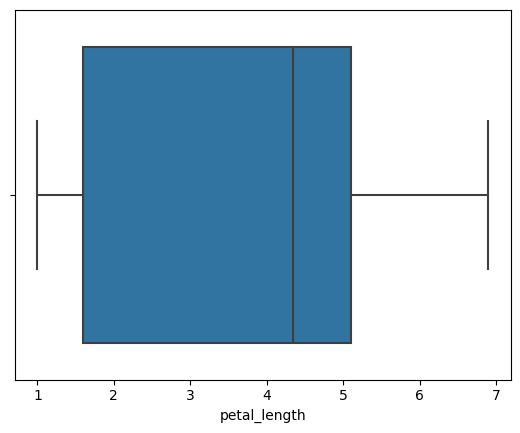

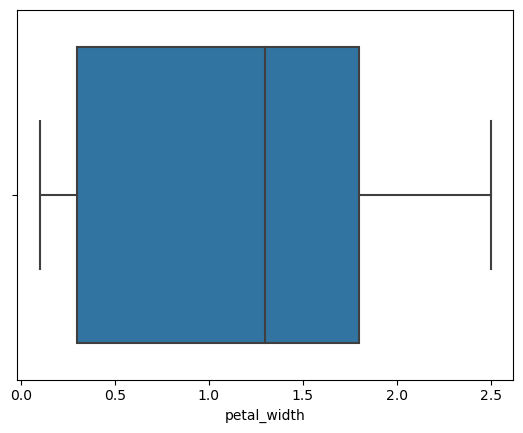

In [12]:
plt.figure(1)
sns.boxplot(df.petal_length)
plt.figure(2)
sns.boxplot(df.petal_width)

In [13]:
# Seperating dependent and independent variables
x = df.drop(columns="species")
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
y = df["species"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [15]:
# Split train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [17]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()

In [18]:
model_LR.fit(x_train, y_train)

LogisticRegression()

In [19]:
y_pred = model_LR.predict(x_test)

In [20]:
# Accuracy
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy: ", accuracy_score(y_pred, y_test)*100)

Accuracy:  100.0


In [21]:
# Support vector machine
from sklearn.svm import SVC
model_SVC = SVC()

In [22]:
model_SVC.fit(x_train, y_train)

SVC()

In [23]:
y_pred = model_SVC.predict(x_test)

In [24]:
# Accuracy
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy: ", accuracy_score(y_pred, y_test)*100)

Accuracy:  100.0


In [25]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()

In [26]:
model_DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred = model_DT.predict(x_test)

In [28]:
# Accuracy
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy: ", accuracy_score(y_pred, y_test)*100)

Accuracy:  100.0


In [29]:
print(classification_report(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [31]:
# Testing
print("Prediction by Logistic Regression: ",model_LR.predict([[5.1,3.5,1.4,0.2]]))
print("Prediction by Support Vector Classifier: ",model_SVC.predict([[5.1,3.5,1.4,0.2]]))
print("Prediction by Decision Tree Classifier: ",model_DT.predict([[5.1,3.5,1.4,0.2]]))

Prediction by Logistic Regression:  ['Iris-setosa']
Prediction by Support Vector Classifier:  ['Iris-setosa']
Prediction by Decision Tree Classifier:  ['Iris-setosa']
